# Clustering Algorithms

## Hierarchical Clustering

In [1]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We are going to use the functions that scipy provide for hierarchical agglomerative clustering. 
We will also continue working with the iris dataset

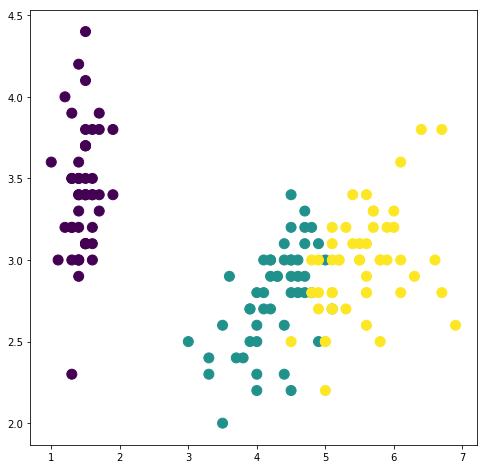

In [2]:
iris = datasets.load_iris()
plt.figure(figsize=(8,8))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=iris['target'],s=100);

From the plot we can see that the classes from the labels do not form well separated clusters, so it is going to be difficult for hierarchical clustering to discover these three clusters. 

First we apply **single linkage** clustering to the iris dataset

CPU times: user 8.73 ms, sys: 48.2 ms, total: 56.9 ms
Wall time: 102 ms


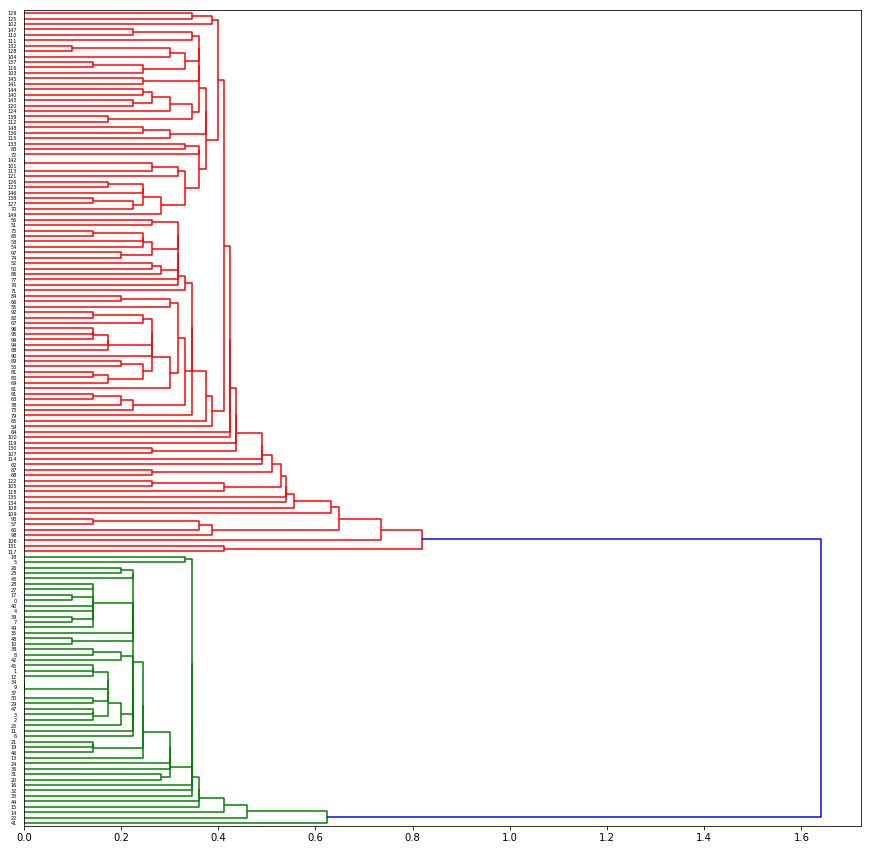

In [3]:
%time clust = linkage(iris['data'], method='single')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

There is only evidence of two distinctive partitions in the dataset, some inversions also appear on the dendrogram. If we cut the dendreogram so we have tree clusters we obtain the following

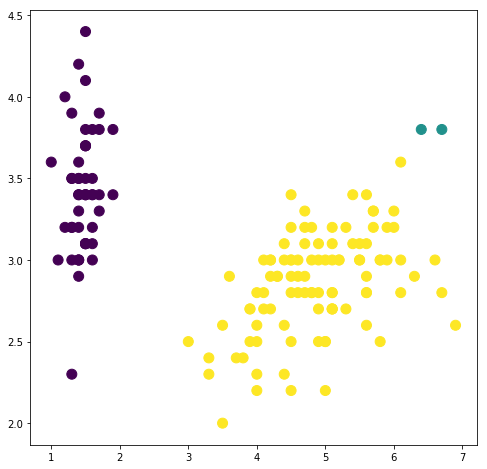

In [4]:
plt.figure(figsize=(8,8))
clabels = fcluster(clust, 3, criterion='maxclust')

plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels ,s=100);

We can compare the true labels with the ones obtained using this clustering algorithm using for example the mutual information score

In [5]:
print("AMI= ", adjusted_mutual_info_score(iris['target'], clabels))

AMI=  0.58209282222


Not a very good result

Lets apply the **complete link** criteria to the data.

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.51 ms


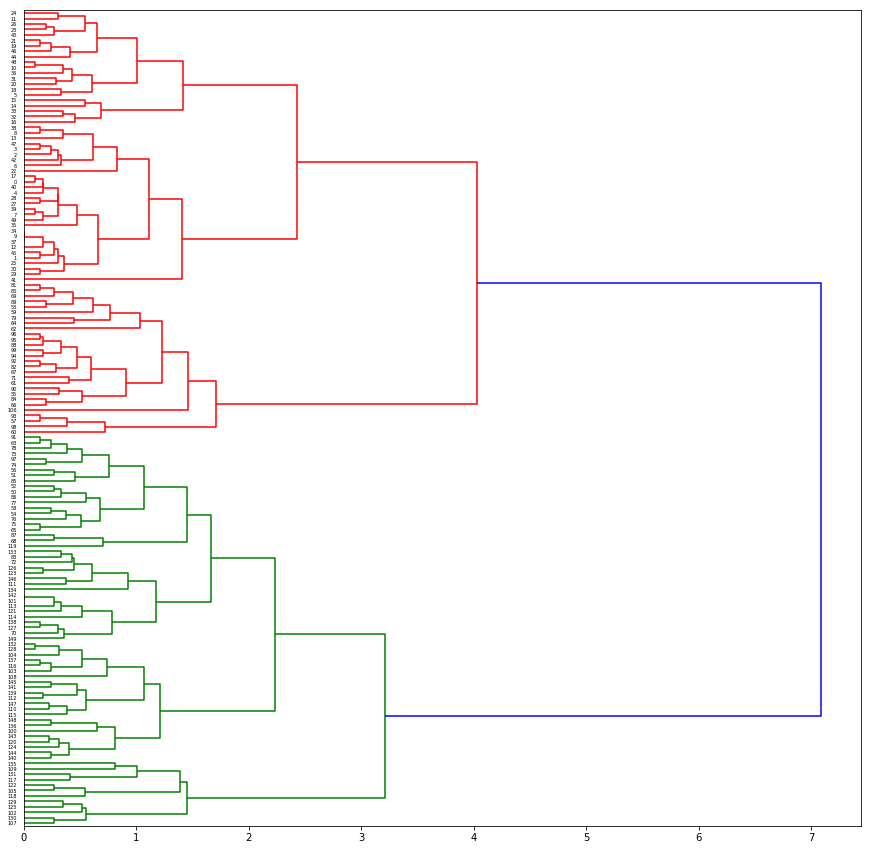

In [6]:
%time clust = linkage(iris['data'], method='complete')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

Also two aparent clusters, but if we cut the dendrogram to three clusters we obtain something a little better.

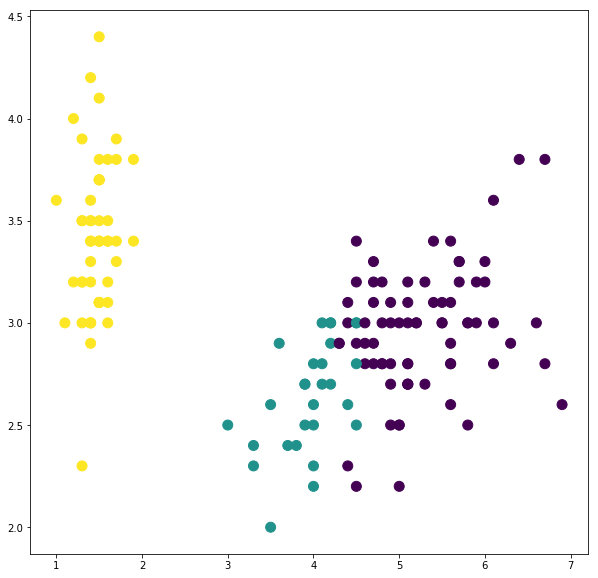

In [7]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

If we compute the mutual information score

In [8]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.696348369667


Now we use the **average link** criteria to the data.

CPU times: user 1.37 ms, sys: 195 µs, total: 1.56 ms
Wall time: 1.19 ms


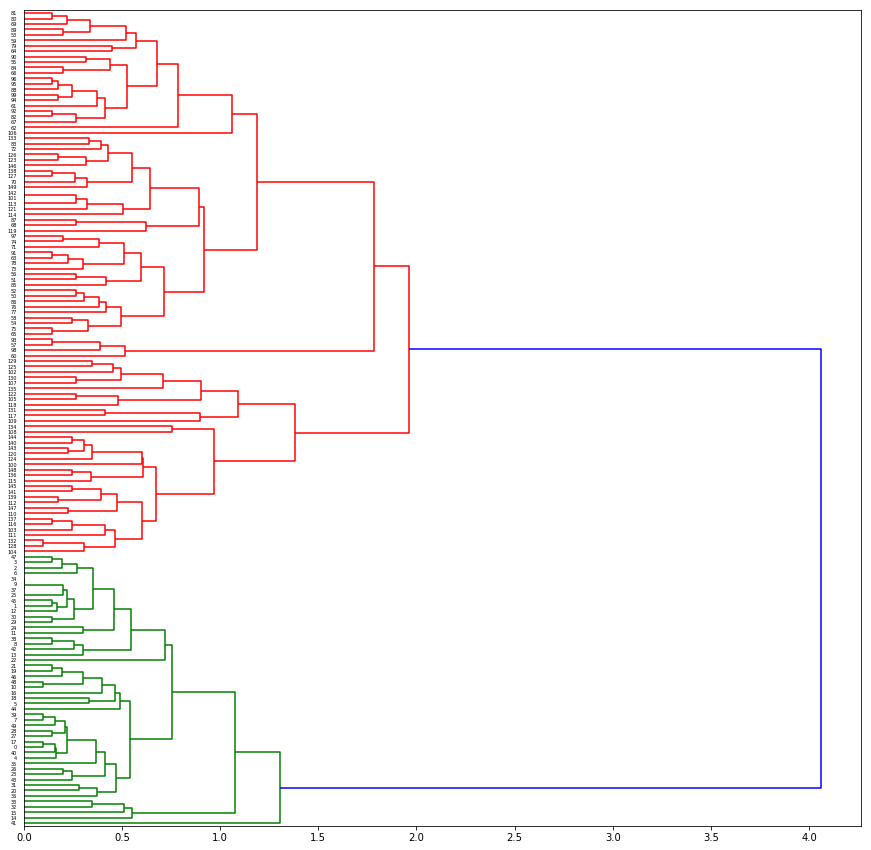

In [9]:
%time clust = linkage(iris['data'], method='average')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

We cut again to obtain three classes

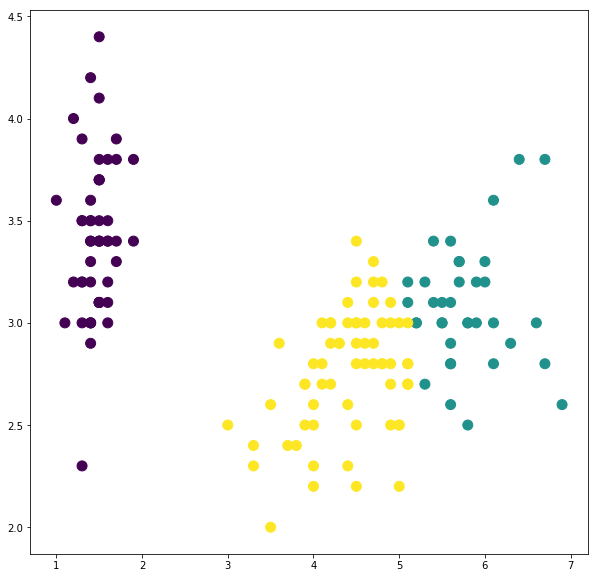

In [10]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

In this case the mutual information scores higher for this criteria.

In [11]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.793425051544


Now we apply the **Ward criterion** (uses the variances of the clusters)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 2 ms


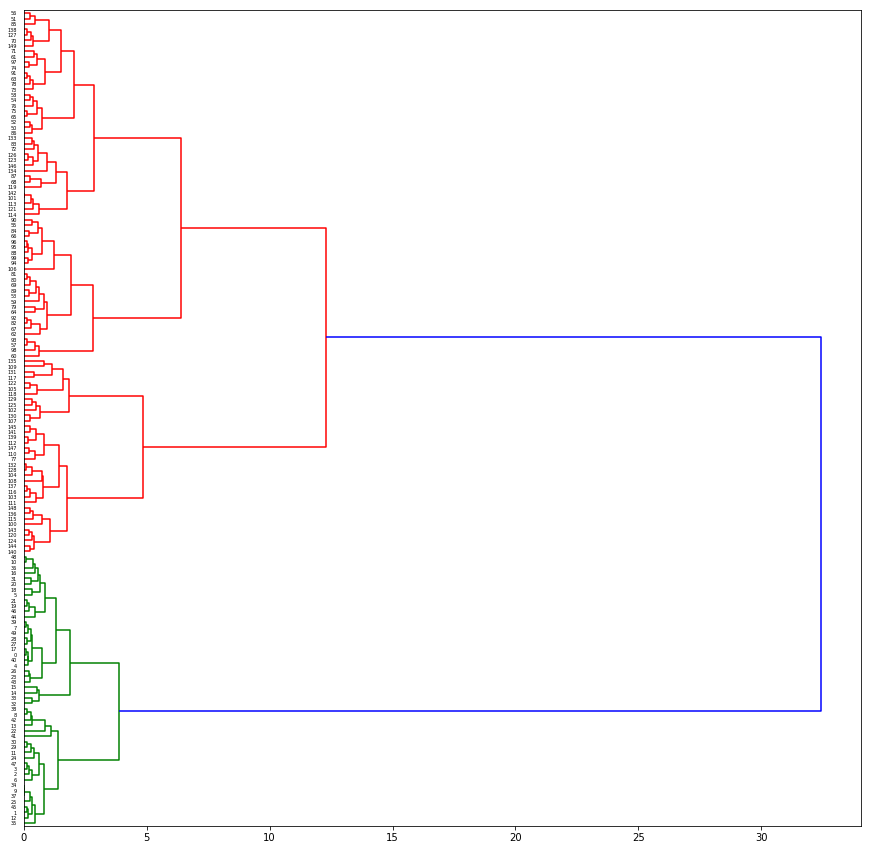

In [12]:
%time clust = linkage(iris['data'], method='ward')
plt.figure(figsize=(15,15))
dendrogram(clust, distance_sort=True, orientation='right');

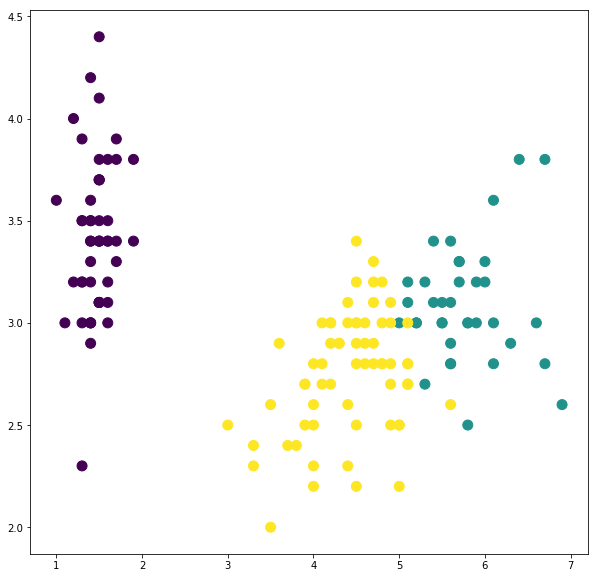

In [13]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100);

This criteria scores a little lower than the previous one. As we do not usually have the labels with a real unsupervise dataset we will have to use other quality criteria to decide the method to use for clustering the data.

In [14]:
print (adjusted_mutual_info_score(iris['target'], clabels))

0.757803422509
